### Modelagem matemático-computacional : Método LLS (Regressão linear)

Vamos introduzir um modelo simples e muito poderoso para o estudo de dados: A regressão linear. Com ela podemos estimar comportamento de algumas funções por meio da extrapolação ou interpolação, o primeiro busca estimar um ponto que esteja presente fora do intervalo que os pontos se enquadram, já o segundo busca estimar onde os pontos estão presentes. A regressão linear pode auxiliar nesta estimativa encontrando, por exemplo, a melhor reta que traduz um conjunto de dados com comportamento linear. 

Para isso, considere 2 pontos $(x_1,y_1)$ e $(x_2,y_2)$ como conjunto de dados, queremos encontrar a melhor reta que passa por esse pontos. Dado que a equação da reta é da forma: $y = mx + c$.

Temos que essa equação deve satisfazer o sistema em : 

$$y_1 = mx_1 + c$$
$$y_2 = mx_2 + c$$

onde os coeficientes são dados por:

$$c = \dfrac{x_1y_2 - x_2y_1}{x_1 - x_2}$$
$$m = \dfrac{y_2 - y_1}{x_2 - x_1}$$

No algoritmo a seguir vemos como é efetuado o calculo neste caso.

p0 =  [1, 2] p1 =  [4, 3]
c=  1.6666666666666667 m=  0.3333333333333333


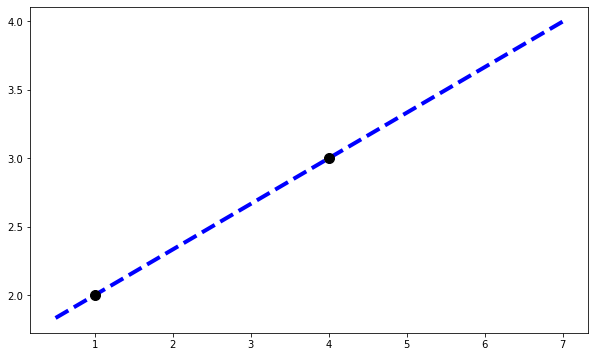

In [134]:
import matplotlib.pyplot as plt 
import numpy as np

def lin_reg_2(x,y):
    return [(x[0]*y[1] - x[1]*y[0])/(x[0] - x[1]),(y[1] - y[0])/(x[1]-x[0])]

x_ = [1,4]
y_ = [2,3]
c,m = lin_reg_2(x_,y_)
print("p0 = ",[1,2], "p1 = ", [4,3])
print("c= ",c,"m= ", m)
intval = np.linspace(0.5,7,10)
plt.plot(intval,m*intval + c,'--', color = 'blue', linewidth = 4)
plt.plot(x_,y_,'o',color = 'black', markersize = 10)

plt.show()

Podemos utilizar a representação matricial para esses casos, onde temos :

$$y  = \begin{bmatrix}y_2 \\ y_2 \end{bmatrix}$$

$$p  = \begin{bmatrix}c \\ m \end{bmatrix}$$

e então definimos a matriz **A**, de forma que nossa equação fique da forma $y = Ap$:

$$y  = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \end{bmatrix}$$

e então, multiplicando pela matriz inversa:

$$A^{-1}y = A^{-1}Ap \Longrightarrow p = A^{-1}y$$



In [135]:
def lin_reg_matrix_2(x,y):
    A = np.matrix(([1,x[0]],[1,x[1]]))
    
    p = np.linalg.inv(A)*np.reshape(y,(2,1))
    
    return p

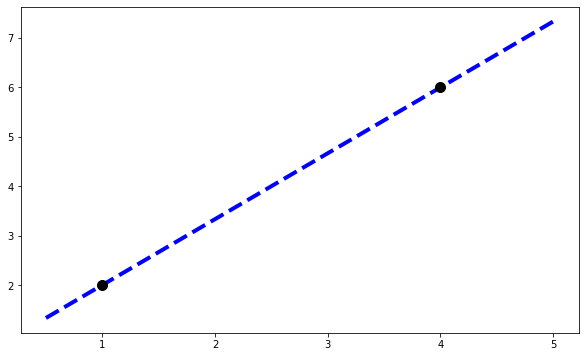

In [136]:
x_ = [1,4]
y_ = [2,6]
arg = lin_reg_matrix_2(x_,y_)
intval = np.linspace(0.5,5,10)
plt.plot(intval,arg[1,0]*intval + arg[0,0],'--', color = 'blue', linewidth = 4)
plt.plot(x_,y_,'o',color = 'black', markersize = 10)
#plt.show()

### Generalização

Por fim podemos generalizar e efetuar para um conjunto de **N** pontos $(x,y)$, para isso vamos definir as matrizes $A, A^T, p$ e $y$ dados os vetores $x$ e $y$.

$$
y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
A  = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}
p = \begin{bmatrix} c \\ m \end{bmatrix}
$$

de modo que $A^T$

$$
A^T  = \begin{bmatrix} 1 & 1 & \cdots & 1\\ x_1 & x_2 \cdots & x_n  \end{bmatrix} $$

A equação que resolve o problema é $\vec{y} = A\vec{p}$, porém $A$ não é quadrada, então vamos multiplicar ambos os lados por $A^T$ resultando em

$$ A^T \vec{p} = A^T A \vec{y}$$

definindo $S = A^T A$ e $S^{-1} = (A^T A)^{-1}$ e multiplicando em ambos os lados da equação:

$$ S^-1 A^T \vec{y} = (A^TA)A^T\vec{y} = S^{-1}S \vec{p} = \vec{p}$$

por fim se definirmos $U = S^{-1}A^T = (A^TA)^{-1} A^T$, obtemos a equação geral:

$$\boxed{ \vec{p} = U \vec{y}}$$


Cujo erro é fornecido pela soma dos quadrados da diferença entre o ponto real e sua aproximação na reta encontrada, assim se definirmos $\delta = y_{lls}^i - y_i$, ficamos com:

$$\epsilon = \sum_{i=1}^{N} \delta^2 = \sum_{i=1}^{N} [(m \cdot x_i + c) - y_i]^2 $$

In [145]:
def LLS_linear(x,y):
    
    if (type(x) == list):
        x = np.array(x)
    if (type(y) == list):
        y = np.array(y)
    
    ''' 
    Função que aplica o método dos mínimos quadrados linear utilizando a forma matricial
    
    Input: 
        * 2 lista ou arrays numpy com os pontos x e y
    Output:
        * Retorna os coeficientes c e m da regressão linear, sua equação e o erro associado
        * Faz o plot dos pontos
    '''
    
    
    size = len(x)
    y = y.reshape(size,1)
    A = np.matrix((np.ones(size), x)).T
    U = np.linalg.inv(A.T*A)*A.T
    p = U*y
    
    delta = p[1,0]*x + p[0,0] - y.reshape(1,size)
    e = np.sum(delta**2)
    
    
    print('c = ', p[0,0], 'm = ', p[1,0], '\nEquation: y = ', p[0,0],'x','+ ', p[1,0])
    print('error = ', e/size)
    
    fig,axs = plt.subplots()
    plt.rcParams['figure.figsize'] = (10,6)
    
    axs.plot(x,y,'o', color = 'black', markersize = 5)
    axs.errorbar( x, p[1,0]*x + p[0,0], e/size, color = 'red')

c =  4.232487533786218 m =  -0.8177658692581362 
Equation: y =  4.232487533786218 x +  -0.8177658692581362
error =  3.1392657993333293


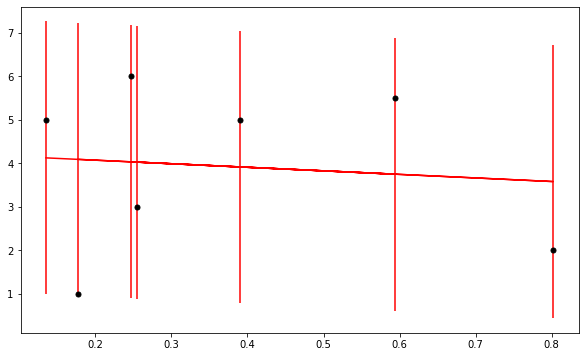

In [146]:
LLS_linear(np.random.random(7),np.array([1,3,5,2,6,5.5,5]))